# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_eth = 5.3
my_btc = 1.2



In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_data= requests.get(btc_url)
btc_price = btc_data.json()
btc_price=btc_price["data"]["1"]["quotes"]["USD"]["price"]

# print(btc_price)


# Fetch current ETH price
eth_data =  requests.get(eth_url)
eth_price=eth_data.json()
eth_price=eth_price["data"]["1027"]["quotes"]["USD"]["price"]
# print(eth_price)

# Compute current value of my crpto
my_btc_value = btc_price*my_btc
my_eth_value = eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27633.60
The current value of your 5.3 ETH is $8318.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2023-01-27", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame


print(df_portfolio)
# Separate ticker data

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_portfolio

                              open    high     low   close    volume  \
timestamp                                                              
2023-01-27 05:00:00+00:00   99.960  100.14   99.91  100.08   5123098   
2023-01-27 05:00:00+00:00  403.655  408.16  403.44  405.68  68346180   

                           trade_count        vwap symbol  
timestamp                                                  
2023-01-27 05:00:00+00:00        18192  100.061411    AGG  
2023-01-27 05:00:00+00:00       496480  405.790293    SPY  


AGG                                              \
                            open    high    low   close   volume trade_count   
timestamp                                                                      
2023-01-27 05:00:00+00:00  99.96  100.14  99.91  100.08  5123098       18192   

                                           SPY                          \
                                 vwap     open    high     low   close   
timestamp                                                                
2023-01-27 05:00:00+00:00  100.061411  403.655  408.16  403.44  405.68   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-01-27 05:00:00+00:00  68346180      496480  405.790293

In [31]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AGG & SPY
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date
print(df_closing_prices)

agg_close_price = df_closing_prices.iloc[0]['AGG']
spy_close_price = df_closing_prices.iloc[0]['SPY']
# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

               AGG     SPY
2023-01-27  100.08  405.68
Current AGG closing price: $100.08
Current SPY closing price: $405.68


In [32]:
# Compute the current value of shares
my_spy_value = spy_close_price*my_spy
my_agg_value = agg_close_price*my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20284.00
The current value of your 200 AGG shares is $20016.00


### Savings Health Analysis

In [66]:
# Set monthly household income
monthly_income=12000


data = {'Person' : ["me"],
        'SPY_Assets': [my_spy_value],
        'AGG_Assets': [my_agg_value],
        'ETH_Assets': [my_eth_value],
        'BTC_Assets': [my_btc_value],
        'Total_Assets': [my_spy_value+my_agg_value+my_eth_value+my_btc_value]
        }


# Consolidate financial assets data
df_savings= pd.DataFrame(data)
df_savings = df_savings.set_index('Person') 

total_savings = my_spy_value+my_agg_value+my_eth_value+my_btc_value
print(total_savings)

# Display savings DataFrame
df_savings.head()

76251.897


,SPY_Assets,AGG_Assets,ETH_Assets,BTC_Assets,Total_Assets
Person,,,,,
me,20284.0,20016.0,8318.297,27633.6,76251.897


In [68]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings = my_spy_value+my_agg_value+my_eth_value+my_btc_value
print(total_savings)

# Validate saving health

if emergency_fund > total_savings: 
    print("Total savings is less than ideal amount, save more!")
else:
    print("Great! Your savings amount is sufficient.")


76251.897
Great! Your savings amount is sufficient.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [69]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-27', tz='America/New_York').isoformat()

In [74]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head(10)



# Reorganize the DataFrame

AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])


# Display sample data
df_stock_data.head(5)

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns







In [76]:
# Printing the simulation input data

MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 30,
    num_trading_days = 252*30
)

MC_30year.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [77]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003966,1.003946,0.999537,0.999278,0.995299,1.008498,0.991906,1.000793,1.006538,1.006780,...,0.991299,1.010920,1.016761,0.995058,1.002328,0.992100,0.999872,1.000339,1.000916,0.997798
2,0.999893,1.001193,0.986013,0.999871,0.996441,1.013931,0.998554,0.989392,0.995133,1.003284,...,0.987698,1.010538,1.024096,0.987756,1.001696,0.992661,0.998897,1.001148,0.993187,1.002225
3,0.988665,1.007379,0.981870,1.007836,0.994258,1.010577,0.994977,0.984336,0.987336,1.003252,...,0.990891,1.007901,1.031169,0.989643,1.011374,0.992937,0.996245,0.995999,0.990819,0.993389
4,0.987564,1.003748,0.990545,0.997614,0.986553,1.001720,1.004448,0.989375,0.995150,1.008212,...,0.987829,1.004490,1.043373,0.997090,1.012059,0.989409,0.996750,0.997231,0.992716,0.988874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.011368,15.570300,9.276011,17.573494,13.684139,8.890363,10.205199,5.919407,7.331362,11.505598,...,24.536558,6.169907,11.855609,17.017453,7.731537,10.804757,12.600117,7.076471,11.590305,8.831366
7557,7.966093,15.622063,9.257432,17.696618,13.610314,8.864627,10.175470,5.896615,7.341030,11.516918,...,24.465336,6.129469,11.846436,17.118496,7.778781,10.901457,12.655791,7.090450,11.544717,8.783884
7558,7.971576,15.652409,9.283874,17.525784,13.698171,8.979436,10.282010,5.940897,7.385094,11.507333,...,24.431319,6.126059,11.975711,17.002796,7.851904,10.795305,12.745005,6.994844,11.476485,8.800278
7559,7.965432,15.731484,9.280062,17.526320,13.552689,9.057094,10.319178,5.914766,7.412602,11.531642,...,24.398349,6.162644,11.885693,17.026336,7.899488,10.769723,12.846071,7.050458,11.472016,8.840640


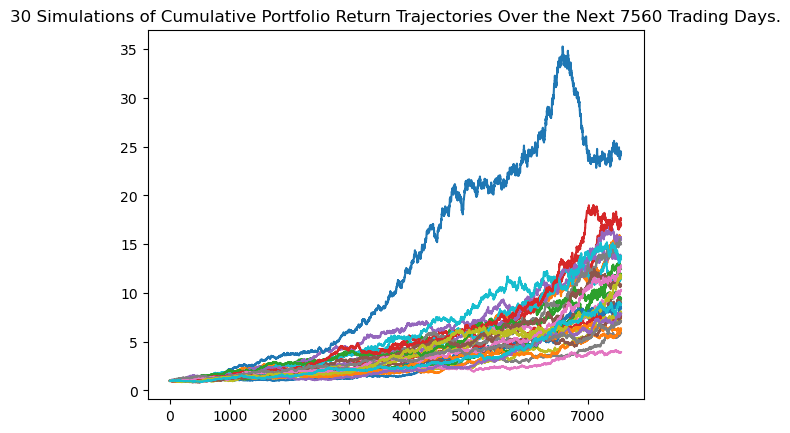

In [78]:

# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()


count           30.000000
mean            10.851059
std              4.354593
min              3.922737
25%              7.844626
50%              9.836358
75%             13.293931
max             24.360954
95% CI Lower     5.341560
95% CI Upper    19.439475
Name: 7560, dtype: float64


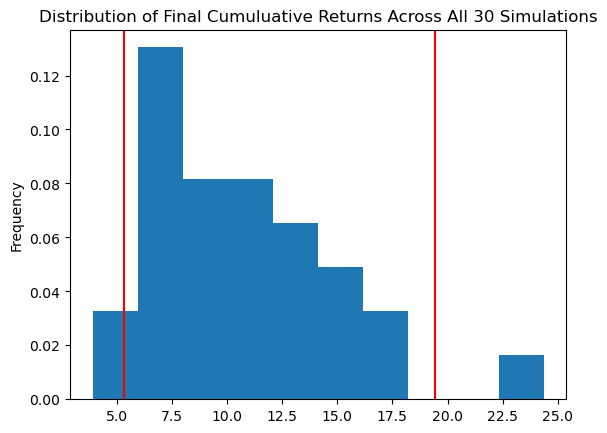

In [80]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()



### Retirement Analysis

In [81]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           30.000000
mean            10.851059
std              4.354593
min              3.922737
25%              7.844626
50%              9.836358
75%             13.293931
max             24.360954
95% CI Lower     5.341560
95% CI Upper    19.439475
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [83]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $106831.2 and $388789.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [84]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(tbl[8]*initial_investment2,2)
ci_upper2 = round(tbl[9]*initial_investment2,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $160246.8 and $583184.24


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")